In this notebook, I will investigate the degree of missingness. First on the X, and then the autosomes.
Then, I will look at various other measures to identify whether other sites should be removed, such as HW-filtering.

In [1]:
%run ../scripts/notebook_settings.py

In [2]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chrX"
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode="r")
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")

Creating the gt dataframe

In [3]:
gt = allel.GenotypeArray(callset["calldata/GT"])
n_s = len(callset["samples"]) #number of samples

Calculating and plotting missingness

In [4]:
missingness = gt.is_missing()

In [5]:
m_per_s = missingness.sum(axis=1)

In [6]:
d = {"m": m_per_s, "pos": callset["variants/POS"]}
m_df = pd.DataFrame(data=d)

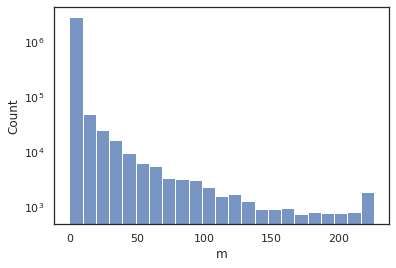

In [7]:
g = sns.histplot(m_df, x="m")
g.set_yscale("log")

In [8]:
len(m_df.loc[m_df.m == n_s]) #0 sites with no calls, as all individuals are present now.
len(m_df.loc[m_df.m == 0]) #2522608 sites with no missing
len(m_df.loc[m_df.m == 0])/len(m_df) #0.862 of sites has no missing
len(m_df.loc[m_df.m <= n_s*0.1])/len(m_df) #0.973 of sites has less than 10 % missing
len(m_df.loc[m_df.m <= n_s*0.2])/len(m_df) #0.986 of sites has less than 20 % missing

0.9862880283742678

Same analysis, now on chr7

In [9]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_01_03_2021/callset.zarr/chr7"
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode='r')
gt = allel.GenotypeArray(callset["calldata/GT"])
n_s = len(callset["samples"]) #number of samples
missingness = gt.is_missing()
m_per_s = missingness.sum(axis=1)
d = {"m": m_per_s, "pos": callset["variants/POS"]}
m_chr7_df = pd.DataFrame(data=d)

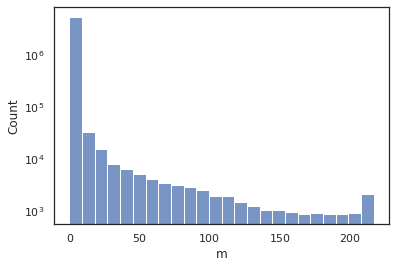

In [10]:
g = sns.histplot(m_chr7_df, x="m")
g.set_yscale("log")

Repeating X analysis based on zarr, and with the newer metadata generated in dp01

In [22]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chrX"
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode='r')
gt = allel.GenotypeArray(callset["calldata/GT"])

In [23]:
n_s = len(callset["samples"]) #number of samples
missingness = gt.is_missing()
m_per_s = missingness.sum(axis=1)
d = {"m": m_per_s, "pos": callset["variants/POS"]}
m_zarr_df = pd.DataFrame(data=d)

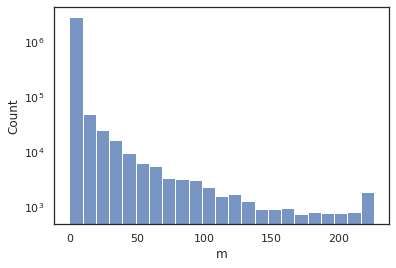

In [24]:
g = sns.histplot(m_zarr_df, x="m")
g.set_yscale("log")

In [27]:
len(m_zarr_df.loc[m_zarr_df.m <= n_s*0.1])/len(m_zarr_df) #0.973 again
len(m_zarr_df.loc[m_zarr_df.m <= n_s*0.05])/len(m_zarr_df) #0.958

0.9581963265065961

Now only with females and less than 1 % missing
I notice now that I misread dp02 by a factor of 10 - the highest degree of missingness is 1,6 %, not 16 %

In [28]:
females = meta_data_samples.loc[(meta_data_samples.Sex == "F")]
max(females["x_missing"]), len(females)

(0.0221632916121034, 99)

In [29]:
females

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin,x_missing
0,16066,16066_3130,Rogers,Papio,cynocephalus,"Mikumi, Tanzania",F,"Mikumi, Kilosa, Morogoro, Coastal Zone, Tanzania",36.977032,-7.404852,0,"Cynocephalus, Central Tanzania",0.013908
1,16098,16098_5026,Rogers,Papio,cynocephalus,"Mikumi, Tanzania",F,"Mikumi, Kilosa, Morogoro, Coastal Zone, Tanzania",36.977032,-7.404852,1,"Cynocephalus, Central Tanzania",0.013826
4,34449,34449_BZ11022,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,4,"Kindae, Zambia",0.013498
5,34474,34474_BZ11050,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,5,"Kindae, Zambia",0.013767
6,38168,38168_891096,Jolly/Bronx Zoo,Theropithecus,gelada,captive,F,"SDSU Captive Wildlife Research Facility, Brook...",-96.793280,44.334031,6,"Gelada, Captive",0.022163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,PD_0788,34413_BZ11060,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,220,"Kindae, Zambia",0.010075
221,PD_0789,34417_BZ11064,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,221,"Kindae, Zambia",0.010196
222,PD_0790,34418_BZ11065,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,222,"Kindae, Zambia",0.009835
223,PD_0791,34419_BZ11066,Rogers/Jolly/Phillips-Conroy,Papio,kindae,"Chunga, Zambia",F,"Chunga, Mumbwa District, Central Province, Zambia",26.005210,-15.053557,223,"Kindae, Zambia",0.009672


In [30]:
IDs = (meta_data_samples.loc[(meta_data_samples.x_missing <= 0.01)
                             & (meta_data_samples.Sex == "F")]).callset_index.values
len(IDs)

89

In [31]:
gt

<GenotypeArray shape=(2923212, 227, 2) dtype=int8>
1/1 1/1 0/0 ./. 0/0 ... 0/0 0/0 ./. 0/1 0/1
1/1 0/1 0/0 ./. 0/0 ... 0/0 0/0 ./. 0/1 0/1
0/1 0/0 0/0 1/1 0/0 ... 0/1 0/0 0/1 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
./. 1/1 0/1 1/1 1/1 ... 1/1 1/1 ./. 1/1 1/1

In [32]:
gt_females = gt.take(IDs, axis=1)

In [33]:
n_s = len(IDs) #number of samples
missingness = gt_females.is_missing()
m_per_s = missingness.sum(axis=1)
d = {"m": m_per_s, "pos": callset["variants/POS"]}
m_zarr_f_df = pd.DataFrame(data=d)

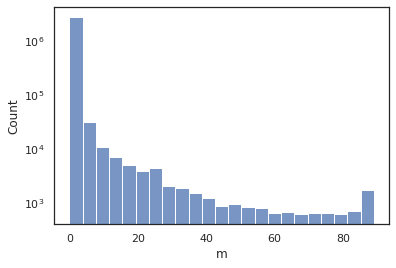

In [34]:
g = sns.histplot(m_zarr_f_df, x="m")
g.set_yscale("log")

In [35]:
len(m_zarr_f_df.loc[m_zarr_f_df.m <= n_s*0.1])/len(m_zarr_df),len(m_zarr_f_df.loc[m_zarr_f_df.m <= n_s*0.05])/len(m_zarr_df) #0.96

(0.9852378137473436, 0.9765336896537097)

Picking out the sites to keep:

In [36]:
len(m_per_s <= n_s*0.05) #2923212, all sites as it is a boolean

2923212

In [38]:
len(np.nonzero(m_per_s <= n_s*0.05)[0]) #2854615 sites

2854615

In [ ]:
len(np.nonzero(m_per_s <= n_s*0.05)[0])/len(m_per_s <= n_s*0.05)

To avoid saving too many intermediate files, I am also going to do the rest of the site filtering in this notebook.
First, looking into the inbreeding coefficient.

In [ ]:
gt_missing_filter = gt_females.take(np.nonzero(m_per_s <= n_s*0.05)[0])
gt_missing_filter

In [ ]:
obs_het = allel.heterozygosity_observed(gt_females)

Quick simulation to check the expected distribution of coefficients given true allele freq of 0.5:

In [ ]:
sim_het = np.random.binomial(n_s, 0.5, 10000000)/n_s #n_s is the number of samples
sim_inbreed = 1-sim_het/0.5

In [ ]:
d = {"sim_inbreed": sim_inbreed}
sim = pd.DataFrame(data=d)
g = sns.histplot(sim, x="sim_inbreed", bins=n_s)

In [ ]:
sim["sim_inbreed"].quantile(0.005)

Fill determines what to do when expected heterozygosity = 0, which means that the site is invariant.
I can set the inbreeding to be -2 there, but choose to set it as 0 to not filter those sites. For shared variants, fixed derived has some interests.

In [ ]:
inbreeding = allel.inbreeding_coefficient(gt_females, fill=0)

In [ ]:
d = {"inbreeding": inbreeding}
hw_df = pd.DataFrame(data=d)

In [ ]:
g = sns.histplot(hw_df, x="inbreeding", bins=25)
g.set_yscale("log")

In [ ]:
sub_hw = hw_df.loc[(hw_df.inbreeding > -0.3) & (hw_df.inbreeding < 0.3)]
g = sns.histplot(sub_hw, x="inbreeding", bins=25)
g.set_yscale("log")

In [ ]:
sum((inbreeding > -0.3) & (inbreeding <= 1))/len(inbreeding)

In [ ]:
sum(inbreeding > -0.3)

In [ ]:
kept_i = np.nonzero((m_per_s <= n_s*0.05) & (inbreeding > -0.3))[0]
len(kept_i)/len(inbreeding)

In [ ]:
np.save("../data/kept_pos_x_female", kept_i)

As a last check, here is how it looks when investigating inbreeding after having removed missing:

In [ ]:
inbreeding = allel.inbreeding_coefficient(gt_missing_filter, fill=0)
d = {"inbreeding": inbreeding}
hw_df = pd.DataFrame(data=d)
g = sns.histplot(hw_df, x="inbreeding", bins=25)
g.set_yscale("log")